<a href="https://colab.research.google.com/github/indhra007/2019/blob/master/final_three_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def nmser(x,y):  #to find normalized mean square error-NMSE
    import numpy
    z=0 
    x1=len(x)
    y1=len(y)
    #xmean = numpy.mean(x)
    if x1==y1:
        for k in range(x1):
            if x[k] == 0:
              x[k] = 0.1
            z=z+(((float(x[k])-y[k])**2)/float(x[k]**2))    
            
    elif x1>>y1 or x1<<y1:
        print('invalid list length: please check the list')
    
    z=z/(x1)
    print   ("NORMALIZED MEAN SQUARE ERROR ")
    return (float(z))
    

In [0]:
import sys 
if "../" not in sys.path:
  sys.path.append("../")


In [0]:
#*****************************************************
#first model - linear regression -with history (three )------------- NORMALIZED MODEL  train data scaled
#*****************************************************
from numpy.linalg import inv,qr
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# load dataset
data = [i.strip().split() for i in open('final txt data.txt').readlines()]
#split dataset
train,test=train_test_split(data, shuffle=False, test_size=0.5)

# train data
res1, res2 = map(list, zip(*train))
res1=np.reshape(res1,(-1,1))
res2=np.reshape(res2,(-1,1))
# data normalize
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_x.fit(res1)
x11=scaler_x.transform(res1)
scaler_y.fit(res2)
y11=scaler_y.transform(res2)

xr=np.array([float (x) for x in (x11)]) 
yr=np.array([ float (y) for y in (y11)])
# test data
testx, testy = map(list, zip(*test))
testx=np.reshape(testx,(-1,1))

testx=scaler_x.transform(testx)
xx=np.array([float (x) for x in (testx)])
yoriginal=np.array([ float (y) for y in (testy)])

x1=([xr[2:-1],xr[1:-2],xr[0:-3]])
x1=np.transpose(x1)
print(np.shape(x1),"x-matrix")
y1=np.array([yr[3:]])
y1=np.transpose(y1)
print(np.shape(y1),"y-vector")
# coefficient calc
Q, R = qr(x1)  #using qr decomposition method
b = (inv(R).dot(Q.T).dot(y1))
print("coefficient (b)= ",b,"shape = ",np.shape(b))

# ******* train y_pred calc
ytrain_p = x1.dot(b) #to predict for train values and check the error between prediction and true value
ytrain_pred=scaler_y.inverse_transform(ytrain_p)
res222=(res2[3:])
res222=([float (x) for x in (res222)])
a=(nmser(res222,ytrain_pred))
print("train data ", a,'\n')

# test y calc
x2=([xx[2:-1],xx[1:-2],xx[0:-3]])
x2=np.transpose(x2)
ytest_p =x2.dot(b)
ytest_pred=scaler_y.inverse_transform(ytest_p)
testy=(testy[3:])
testy=([float (X) for X in testy])
print("test data ", nmser(testy,ytest_pred) )

# saving data to excel file
# ytrain_pred=([float (x) for x in ytrain_pred])
# dff1=DataFrame()
# dff1['train'] = res222
# dff1['train_predicted'] = ytrain_pred
# dff1.to_excel(r'/content/sample_data/lg_train_pred.xlsx')


# ytest_pred=([float (x) for x in ytest_pred])
# dff2=DataFrame()
# dff2['test']=testy
# dff2['test_pred']=ytest_pred
#dff2.to_excel(r'/content/sample_data/lg_test_pred.xlsx')


(480, 3) x-matrix
(480, 1) y-vector
coefficient (b)=  [[-9.05454789e+08]
 [ 1.81090958e+09]
 [-9.05454791e+08]] shape =  (3, 1)
NORMALIZED MEAN SQUARE ERROR 
train data  4.086619988398291e-06 

NORMALIZED MEAN SQUARE ERROR 
test data  3.949895386169814e-06


In [0]:
#***********************************
# second model
# model - ARTIFICIAL NEURAL NETWORK
#***********************************
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np
import math
from nltk import flatten
import matplotlib.pyplot as plt

# load dataset
datafile = [i.strip().split() for i in open('final txt data.txt').readlines()]  # file name/path


# split data
train,test=train_test_split(datafile,shuffle=False,test_size=0.5)
# train data

trainx,trainy=map(list,zip(*(train)))

trainx=np.array([[float(x)] for x in trainx])
trainy=np.array([[float(x)] for x in trainy])

trainx_3 = trainy[:(len(trainy)-3)]
trainx_2 = trainy[1:(len(trainy)-2)]
trainx_1 = trainy[2:(len(trainy)-1)]

trainy = trainy[3:]

#print(trainy,'\n','trainy')
num=(len(trainx)-3)
trainx = np.zeros((num,3))

trainx[:,0] = trainx_3.reshape((num))
trainx[:,1] = trainx_2.reshape((num))
trainx[:,2] = trainx_1.reshape((num))
train

trainyy=trainy # for calculating rmse error
x=trainx
y=trainy[:,:]
# reshape
y=np.reshape(y, (-1,1))
#trainx=np.reshape(trainx,(-1,1))
trainy=np.reshape(trainy,(-1,1))
# data normalize
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_x.fit(x)
xscale=scaler_x.transform(x)
scaler_y.fit(y)
yscale=scaler_y.transform(y)
#print(yscale,'\n', 'yscale')
# create model with an additional hidden layer
model = Sequential()
model.add(Dense(669, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(200,activation = 'relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='linear'))

#x_input[:,0] = xscale.reshape((797))
#x_input[:,1] = time
# compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])
# fit model
model.fit(xscale,yscale, epochs=100, batch_size=1,  verbose=1,shuffle=False)

# test data
testxx,testyy=map(list,zip(*(test)))
testx=[[float(x)] for x in testxx]
testy=[[float(y)] for y in testyy]

# predict data
# ----predict train data----

testx_3 = list(trainy[(len(trainy)-3):].reshape((3))) + [item for sublist in testy[:(len(testy)-3)] for item in sublist]
testx_2 = list(trainy[(len(trainy)-2):].reshape((2))) + [item for sublist in testy[:(len(testy)-2)] for item in sublist]
testx_1 = list(trainy[(len(trainy)-1):].reshape((1))) + [item for sublist in testy[:(len(testy)-1)] for item in sublist]


testx = np.zeros((484,3))

testx[:,0] = testx_3
testx[:,1] = testx_2
testx[:,2] = testx_1


ypred_train=model.predict(xscale)

ypred_train1 = scaler_y.inverse_transform(ypred_train)

Xnew = np.array(testx)
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
# invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
trainy= scaler_y.inverse_transform(trainy)


xrevcheck=scaler_x.inverse_transform(xscale)
yrevcheck=scaler_y.inverse_transform(yscale)

# **************** correction needed from here
trainScore = math.sqrt(mean_squared_error(trainyy[:], ypred_train[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testy[:], ynew[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# ******************* nmser calc
testy=flatten(testy)
ynew=([ (x) for x in ynew[:,0]])
ytest_new=ynew
nmser_calc =nmser(testy, ynew)
print(nmser_calc)

#plot predictions
# #plt.scatter(trainx,trainy)
# # ******************* write into excel file
# dff3=pd.DataFrame() 
# dff3['testy']=testy
# dff3['ynew_pred']=ynew
# dff3.to_excel(r'/content/sample_data/testann.xlsx')
del ynew,Xnew,datafile,train,test,ypred_train

Train on 480 samples
Epoch 1/100
480/480 [==============================] - 1s 2ms/sample - loss: 3.4082e-05 - mean_squared_error: 3.4082e-05 - mean_absolute_error: 0.0041 - acc: 0.0042
Epoch 2/100
480/480 [==============================] - 1s 2ms/sample - loss: 9.5277e-05 - mean_squared_error: 9.5277e-05 - mean_absolute_error: 0.0041 - acc: 0.0042
Epoch 3/100
480/480 [==============================] - 1s 2ms/sample - loss: 3.0243e-04 - mean_squared_error: 3.0243e-04 - mean_absolute_error: 0.0055 - acc: 0.0042
Epoch 4/100
480/480 [==============================] - 1s 2ms/sample - loss: 2.1540e-04 - mean_squared_error: 2.1540e-04 - mean_absolute_error: 0.0053 - acc: 0.0042
Epoch 5/100
480/480 [==============================] - 1s 2ms/sample - loss: 2.2416e-04 - mean_squared_error: 2.2416e-04 - mean_absolute_error: 0.0041 - acc: 0.0042
Epoch 6/100
480/480 [==============================] - 1s 2ms/sample - loss: 1.2985e-04 - mean_squared_error: 1.2985e-04 - mean_absolute_error: 0.0031 - a





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





481/481 [==============================] - 2s 4ms/step - loss: 1.6123e-08
Epoch 2/100
481/481 [==============================] - 1s 3ms/step - loss: 0.0034
Epoch 3/100
481/481 [==============================] - 1s 2ms/step - loss: 9.3621e-04
Epoch 4/100
481/481 [==============================] - 1s 2ms/step - loss: 2.0462e-04
Epoch 5/100
481/481 [==============================] - 1s 2ms/step - loss: 4.7863e-05
Epoch 6/100
481/481 [==============================] - 1s 2ms/step - loss: 1.5128e-05
Epoch 7/100
481/481 [==============================] - 1s 2ms/step - loss: 7.1814e-06
Epoch 8/100
481/481 [==============================] - 1s 2ms/step - loss: 4.6580e-06
Epoch 9/100
481/481 [==============================] - 1s 2ms/step - loss: 3.5780e-06
Epoch 10/100
481/481 [==============================] - 1s 3ms/step - loss: 2.9730e-06
Epoch 11/100
481/481 [===============

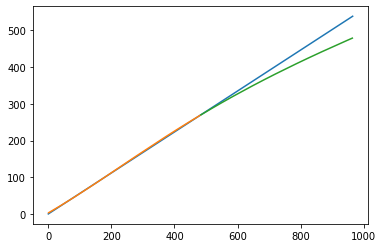

NORMALIZED MEAN SQUARE ERROR 
0.014227185398340225 NORMALIZED MEAN SQUARE ERROR


In [0]:
# *************************************************
# THIRD MODEL
# LSTM for gold price predictions on monthly basis
# *************************************************
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
  
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('monthly_csv.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1 # for lstm purpose
trainX, trainY1 = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainY=trainY1
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1,shuffle=False)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
#save predicted output
# dff6=DataFrame(testY[0], testPredict[:,0]) #
# dff6.to_excel(r'/content/sample_data/testlstm.xlsx')

# dff5=DataFrame(trainY[0], trainPredict[:,0]) #
# dff5.to_excel(r'/content/sample_data/lstm_train.xlsx')

nmser_val=nmser(trainY[0],trainPredict)
print(nmser_val,"NORMALIZED MEAN SQUARE ERROR")



In [0]:
#  **** save all outputs as one


from pandas import DataFrame
dff_final=DataFrame()

ytest_pred=([float (x) for x in ytest_pred])
dff_final=DataFrame()
dff_final['TRUE']=yoriginal[3:]
dff_final['lg_test_pred']=ytest_pred
dff_final['ann_test_pred']=ytest_new[3:]
dff_final['lstm_test_pred']= testPredict[:,0]
#len(yoriginal[3:])==len(ytest_pred)==len(ytest_new[3:])== len(testPredict[:,0])
dff_final.to_csv(r'/content/sample_data/finalpred_data.csv',index = None, header=True)